In [19]:
# K-Means Clustering

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score


# Importing the dataset
dataset = pd.read_csv('C:\\Users\\Ariful\\Desktop\\prediction\\data prediction\\FinalDataSet3 .csv')
dataset=dataset.fillna('0')
dataset = dataset.drop(['Perm_Address'], axis= 1)
dataset = dataset.drop(['Department_Unit'], axis= 1)
X = dataset.iloc[:,0:21].values
target = dataset.iloc[:,-1].values
#print("\nX before making numerical: \n",X)
#print("\ny before making numerical: \n",y)


from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
for i in range(0,21):
    X[:,i]= labelencoder_X.fit_transform(X[:,i])

labelencoder_target = LabelEncoder()
target= labelencoder_y.fit_transform(y)
print("\nX after making numerical: \n",X)
print("\ntarget after making numerical: \n",target)
#col = dataset.columns       # .columns gives columns names in data 
#print(col)
df = pd.DataFrame(X, columns = ['Name', 'Age', 'Gender', 'Marital_status', 'C1-self laughing','C2-self crying', 'C3-Self talking', 'C4-Talkactiveness', 'C5-Food','C6-self important ideas', 'C7-suspicious', 'C8-sleep','C9-outgoing tendency', 'C10-aggressive behaviour', 'C11-odd behaviour','C12-hearing voice', 'C13-speech', 'C14-low mood', 'C15-suicide','C16-lack of self care', 'C17-abuse'])

df.head(5)


X after making numerical: 
 [[9 8 0 ... 0 1 0]
 [168 15 0 ... 0 0 0]
 [20 17 0 ... 0 0 0]
 ...
 [170 7 1 ... 0 0 0]
 [221 10 1 ... 0 0 0]
 [122 5 1 ... 0 0 0]]

target after making numerical: 
 [36  2 36  2  2 36 36  2 36  2 36  8 36  2 36 36  3 36  3 36 36  2 12  3
  3 36 36  3  3 18 36  3  3  3 32 36 12 25 26 36 35 24  2 25  3  3  2  2
 36 36 36 36  5 36 36  3 36 36  1 36 36  2 36 15  2 36  2 10 36 36 36  2
  7 36  4 36 36  2 10 36 36 10 36 10 10 36  2  2 36 12 31 36 36 36 36 36
 36 36  2 31 36 31 36 36 36 12 36  2  2 31 36  2 36 12 36  2  2 36 36  2
 36 11  2 14 21  2  2 36  2  2  2 36  2 36 36 36  2 36 36  2 36 36 36  2
 36  2 15  2 36 36 36 16 29 36 34  2 36  2 36 36 36  6  2  2 30 36 36  2
  2 36  1 36 36 36 36  2  2  2 14 21  2 35 20  2 36 13 36  2  2 36 36 19
  2  2  2 37  9  2 22 42 40 43  2 33 23 33  2  2  2  2  2 36  2  2 36 36
 28  3  2 39  3 27  3 36 36 36 36  0 41 36 36 36 36 36 36  3  3 36 14 36
 39 31  3 33  3 19  2  2  2 37  9  2 44 42 40 43  2 33 23 33  2  2  2  2
  

,Name,Age,Gender,Marital_status,C1-self laughing,C2-self crying,C3-Self talking,C4-Talkactiveness,C5-Food,C6-self important ideas,...,C8-sleep,C9-outgoing tendency,C10-aggressive behaviour,C11-odd behaviour,C12-hearing voice,C13-speech,C14-low mood,C15-suicide,C16-lack of self care,C17-abuse
0,9,8,0,4,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,168,15,0,2,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
2,20,17,0,2,0,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,25,7,0,4,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,0
4,181,19,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [20]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test= train_test_split(X,test_size = 0.33, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

C:\Users\Ariful\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


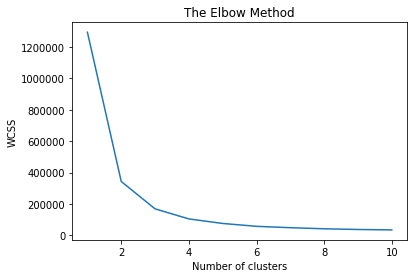

In [21]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

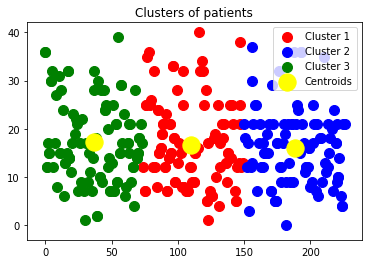

In [22]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of patients')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

In [23]:
# Import the random forest model.
from sklearn.ensemble import RandomForestRegressor

# Initialize the model with some parameters.
model = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)
# Fit the model to the data.
model.fit(X_train[dataset], train[target])
# Make predictions.
predictions = model.predict(X_test[dataset])
# Compute the error.
mean_squared_error(predictions, test[target])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices